In [148]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# データ準備

In [149]:
train = pd.read_csv('train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# ヒストグラム

### FacetGridで書けそう。

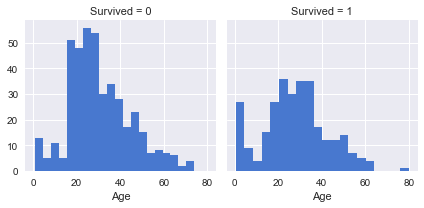

In [150]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### その他プロっぽく。

col, rowの理解

- map(何のグラフで表示したいか,x軸)　*scatterを使うときは、y軸の要素も追加

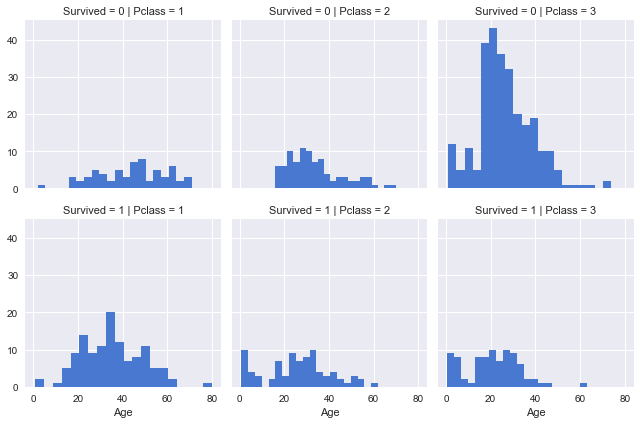

In [151]:
# col x row (3 x 2)
g = sns.FacetGrid(train, col='Pclass', row='Survived')
g.map(plt.hist, 'Age', bins=20)

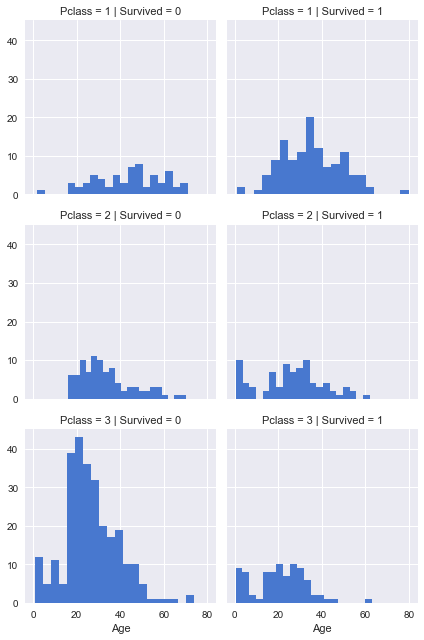

In [152]:
# col x row (2 x 3)
g = sns.FacetGrid(train, col='Survived', row='Pclass')
g.map(plt.hist, 'Age', bins=20)

In [153]:
g = sns.FacetGrid(train, col="time",  row="smoker")
g = g.map(plt.scatter, "total_bill", "tip", edgecolor="w")

KeyError: 'smoker'

- size, aspect, alphaの理解。
- size = Height
- aspect = width (Aspect ratio)
- alpha は、色薄くする。

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=1.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# ヒストグラムの意味

In [ ]:
- 横軸は階級を、縦軸は度数
- パレート図はヒストグラムの各階級の棒を度数が大きい順に左から並べ替え、その上に累積相対度数の折れ線グラフを書いたもの。



In [ ]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

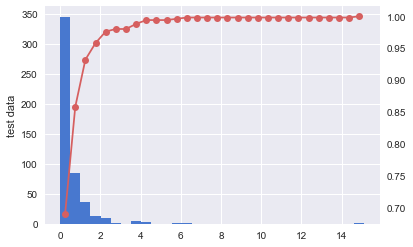

In [154]:
pareto = np.random.pareto(a=2.718281828, size=500)

#fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)
fig, ax1 = plt.subplots()

ax1.set_ylabel('test data')
n, bins, patches = ax1.hist(pareto, bins=30) 
# n: 階級の度数
# bins: 階級 
# patches: ?

# 第2軸用値の算出
x2 = np.convolve(bins, np.ones(2) / 2, mode="same")[1:] 
y2 = np.add.accumulate(n) / n.sum()

# convolve(a,v,mode): aとvの畳み込み積分を行った配列
# np.ones(x): 全て 1 である1行列を生成する関数。長さが xということ。 ex) [1,1]

# 第2軸のプロット
ax2 = ax1.twinx()
lines = ax2.plot(x2, y2, ls='-', color='r', marker='o')
ax2.grid(visible=False)


# その他

これでユニークな値が見えるかな。

In [155]:
train.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


# 参考

[maplotlibのヒストグラムに累積比率を追加する](https://qiita.com/messefor/items/3ba9eb0b58dd6283cc28)